In [2]:
import tensorflow as tf
import pandas as pd

In [6]:
df = pd.read_csv("/Users/hrishikeshhpillai/Documents/hrishi/smartgrid/forecasting/datasets/panamadataset/load_data.csv", parse_dates=['datetime'], index_col = ['datetime'])
df.head()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48048 entries, 2015-01-03 01:00:00 to 2020-06-27 00:00:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nat_demand  48048 non-null  float64
 1   T2M_toc     48048 non-null  float64
 2   QV2M_toc    48048 non-null  float64
 3   TQL_toc     48048 non-null  float64
 4   W2M_toc     48048 non-null  float64
 5   T2M_san     48048 non-null  float64
 6   QV2M_san    48048 non-null  float64
 7   TQL_san     48048 non-null  float64
 8   W2M_san     48048 non-null  float64
 9   T2M_dav     48048 non-null  float64
 10  QV2M_dav    48048 non-null  float64
 11  TQL_dav     48048 non-null  float64
 12  W2M_dav     48048 non-null  float64
 13  Holiday_ID  48048 non-null  int64  
 14  holiday     48048 non-null  int64  
 15  school      48048 non-null  int64  
dtypes: float64(13), int64(3)
memory usage: 6.2 MB


In [9]:
demand = pd.DataFrame(df['nat_demand']).rename(columns={"nat_demand": "demand"})

In [10]:
demand.head()

,demand
datetime,
2015-01-03 01:00:00,970.3450
2015-01-03 02:00:00,912.1755
2015-01-03 03:00:00,900.2688
2015-01-03 04:00:00,889.9538
2015-01-03 05:00:00,893.6865


In [11]:
import matplotlib.pyplot as plt

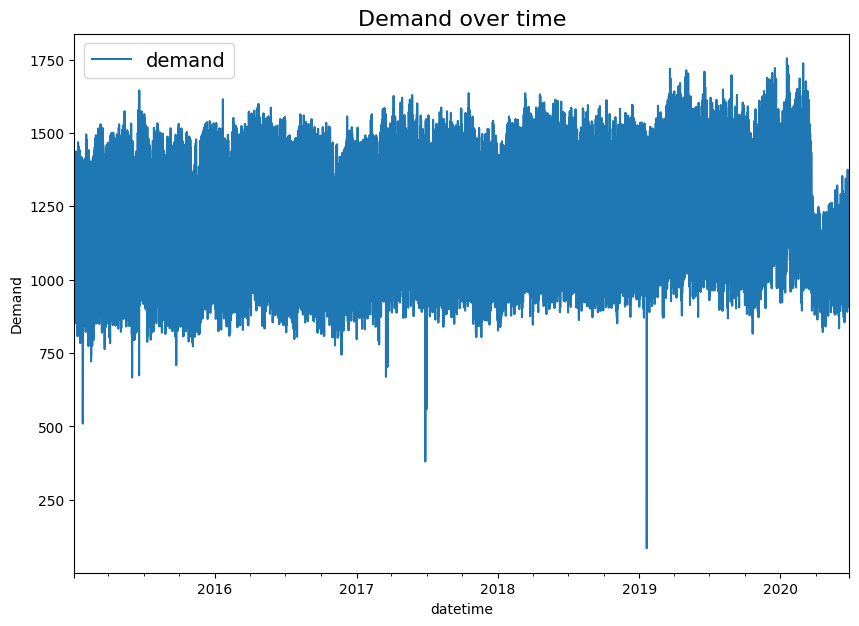

In [12]:
demand.plot(figsize = (10, 7))
plt.ylabel("Demand")
plt.title("Demand over time", fontsize=16)
plt.legend(fontsize=14);

In [13]:
timesteps = demand.index.to_numpy()
current_demand = demand["demand"].to_numpy()

In [14]:
split_size = int(0.8 * len(demand)) # 80% train, 20% test
X_train, y_train = timesteps[:split_size], current_demand[:split_size]
X_test, y_test = timesteps[split_size:], current_demand[split_size:]
len(X_train), len(X_test), len(y_train), len(y_test)

(38438, 9610, 38438, 9610)

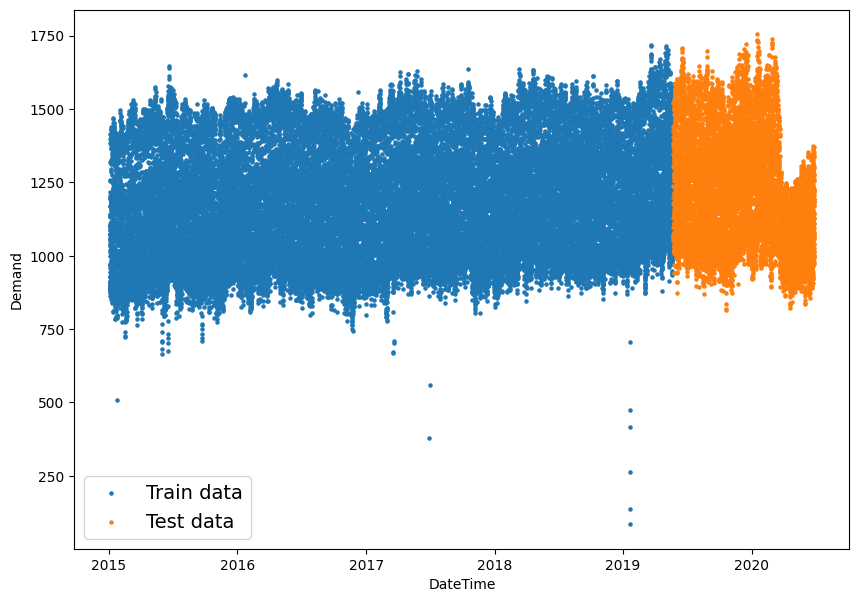

In [15]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("DateTime")
plt.ylabel("Demand")
plt.legend(fontsize=14)
plt.show();

In [16]:
HORIZON = 1
WINDOW_SIZE = 7